<img src="https://raw.githubusercontent.com/nishanthgandhidoss/nishanthgandhidoss.github.io/master/image/tech_logo.png" alt="Tech Logo" align="center" height="200" width="200"/>

<h1 align="center">CS 5841 - Machine Learning</h1>

<h2 align="center">Assignment 3 - Classification with Naive Bayes and Logistic Regression</h2>

For this assignment, you will build Naive Bayes and Logistic Regression classifiers for the MNIST data set. Implement each part and present your code, results, and analysis as a Jupyter Notebook.

## Importing packages

In [1]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import scipy classes
from scipy.stats import mode, multivariate_normal as mv_norm
from scipy.sparse import issparse, csr_matrix

# Import the package mnist from keras
from keras.datasets import mnist

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

# Import timeit
import timeit

# Import Pathlib
from pathlib import Path

# Import Random Integer
import random as rand

# Import Pickle
import _pickle as pickle

# Import Bokeh
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import d3
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

# Import Sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


Loading BokehJS ...

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Download the MNIST data set from http://yann.lecun.com/exdb/mnist/ Links to an external site.. There is a training data set and a test data set. Each image is 28x28 pixels.

## About the MNIST Dataset

Before we get head on into the dataset, models and all those lets first understand what the data is all about. MNIST is a whole bunch of images of handwritten digits that is considered to be one of the best dataset that used as a starter to learn about deep learning and computer vision. It is a good dataset for people because they probabaly don't have much do with data preprocessing and formatting.

The dataset consists of 60000 training images and 10000 testing images of handwritten digits for buliding our models. This  The MNIST dataset by default is available in keras package. Lets just download the data.

As we have already worked on this dataset for 

## Loading the data

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(trainX, trainY), (testX, testY) = mnist.load_data()

Let's confirm that we have the images intact by printing out the first image. In python, images are printed out using the package called matplotlib. So we will first import it and then using it we will print it out.

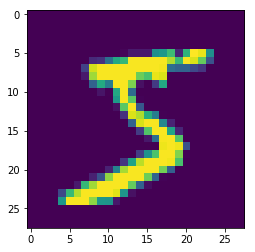

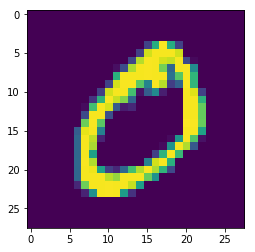

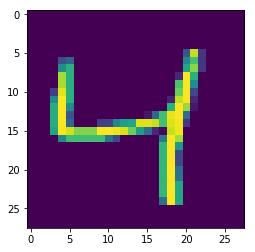

In [3]:
# Print the first three images in the training set
for i in range(3):
    plt.imshow(trainX[i])
    plt.show()

We have the number 5 as first image in the training set. We are sure that we have our data in tact.

It is always helpful when you are working with computer vision problem to plot the data before doing any algorithm work. It's a quick sanity check that can prevent easily avoidable mistakes such as misinterpreting the data dimensions.

## Preprocessing

Since that we have loaded the dataset lets have a look at the shape of the dataset that say how many images we have in our data.

In [4]:
# Shape of the Image feature/pixel value
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


So it's appear that there are 60,000 sample of images in the training set and 10000 images on the test set. Each and every images are of size 28*28 pixels.

But we have a problem here. Having the images as array shape that representing the image pixel ie) (No of images, height, width) is not going to help us for the the Machine Learning alogithum feature representation. We need to reshape it in to the following format.

(No of images, width * height)

Lets do that.

In [5]:
# Reshaping the image feature
X_train = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[1])
X_test = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[1])

# Verifying the reshaping 
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Thus we have reshaped the image properly. Just to be sure that we didn't loose any information while doing the reshaping. Let revert one of the image to old shape and try to print the image and see whether we are able to see it or not.

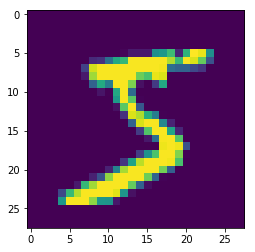

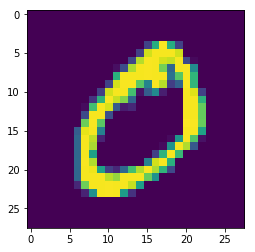

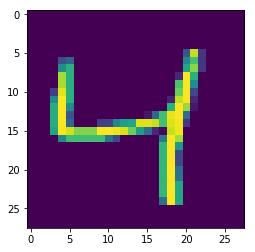

In [6]:
# Plot the first image in the train set
for i in range(3):
    plt.imshow(X_train[i].reshape(28, 28))
    plt.show()

Thus it proves that we have converted our X feature vectors of train and test properely.

Now that being done. Let us move our focus over to the labels for images which says what the number in the image is by checking the shape of the numpy array.

In [7]:
# Print the shape of the array that contains the image labels
print(trainY.shape)
print(testY.shape)

(60000,)
(10000,)


We will reshape the label arrays to shape (length of labels, 1) in order to have ease access while doing computation in the algorithm.

In [8]:
# Reshape the label array
y_train = trainY.reshape(len(trainY), 1)
y_test = testY.reshape(len(testY), 1)

# Check the shape of reshaped label
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


As the data processing needed for is completed let's dive into the questions.

## Part 1

(40 points) Build a Naive Bayes classifier for the the MNIST data set and test it on the test data set. Provide a confusion matrix, accuracy for each digit, and overall accuracy. Comment on your results. 

Assume that the probability model for each pixel is Gaussian and that the probability of each class—i.e., digit—is equal. That is, P(c = 0) = P(c = 1) = : : : = P(c = 9). Let x = (x1; x2; : : : ; x784) be the vector of pixel values for a given image and c is the class or digit, 0 to 9. Hence,

<img src="https://raw.githubusercontent.com/nishanthgandhidoss/nishanthgandhidoss.github.io/master/image/Naive%20bayes%20formula.png" alt="Naive bayes Formula" align="center" height="400" width="400"/>

where P(xi|c) = N(i; ijc) is modeled as a Gaussian from the training data. Train your Naive Bayes classifier and apply it to the test data set. For each of the 10 classes, show an image of the 784 conditional probabilities as a 28  28 image. That is, show an image of P(xijc = 1), i = 1; 2; : : : ; 784 as a 28  28 image, repeat for c = 2, etc. Do these images provide any insight into how this classifier works?

First of all in order to handle the code neat and to provide reusablity of the code, I have coded all the logic for required for the Classfiers and all the processing to be as a seperate object oriendted class objects. First up I bulid the Utils class which consists of plot for the analysis of the model, finding out testing errors, accuracy of model etc.

## Utills Class

In [9]:
class Utills(object):
    """ Helps to convert and work with required tasks
    
    Perform Data processing task such to transform the feature with 
    z-score normalization, one hot encoding of the label for logistic
    multi class regression. You can create the plot, tables for 
    the results representation
    """
    
    def __init__(self):
        """Variable Initialization
        
        Initialize the class variables which can be accessed using 
        the self or class objects
        
        Arguments:
            None
            
        Returns:
             None
        """
        pass
    
    def z_score_norm(self, data):
        """ Normalize the data using z-score
        
        Normalize the data which is mostly a pandas dataframe and 
        outputs normalized dataframe of the same using z-score 
        normalization.https://en.wikipedia.org/wiki/Standard_score
        
        Arguments:
            data: Pandas Dataframe to be normalized
            
        Returns:
            Normalized Pandas Dataframe
        """
        # Finding the z-score using mean and standard deviation of each column
        # Broadcasting is applied over the data
        normalized_df = (data - data.mean()) / data.std()
        return pd.DataFrame(normalized_df)
    
    def onehot_encoder(self, data):
        """ Convert the catergorical feature to binary
        
        Create the data labels in the binary forms of 1s and 0s
        from the categorical feature.
        
        Arguments:
            data: Categorical data to convert to binary 
            
        Returns:
            encoded: Converted data in the form of binary
        """
        # Compute the one hot for the variable
        encoded = OneHotEncoder(sparse=False).fit_transform(data.reshape(len(data), 1))
        return encoded

    def k_fold(self, data, k = 5, seed = 1):
        """ Create K folds of the data
        
        Data is split into K number of chunks depending on the k argument of 
        the function that can be used up for the cross validation purpose.
        
        Arguments:
            data: Pandas Dataframe to be split into K Folds
            k: Number of folds. Default to 5
            
        Returns:
            index: Row index for each train and test set of the folds
        """
        # Creating K-Fold cross validation index.
        index = KFold(len(data), n_folds = k, random_state = seed)
        return index
    
    def accuracy(self, actual, pred, normalize = False):
        """ Compute the model accuracy
        
        Check for the normalization on the predicted value and 
        compute the model accuracy accordingly
        
        Arguments:
            actual: Original labels
            pred: Predicted labels
            normalize: Default is False. Whether the pred argument is 
                normalized or not
                
        Returns:
            acc: accuracy percentage of the model rounded of to 4 decimal
                points
        """
        # Intialize the accuracy
        acc = 0.
        # Normality check and finding the accuracy
        if normalize == True:
            acc = accuracy_score(actual, pred, normalize)
        else:
            acc = accuracy_score(actual, pred)
        return round(acc, 6) * 100
    
    def confusion_matrix_plot(self, actual, pred, title = "Confusion Matrix", height = 9, width = 12):
        """ Heatmap used to represent Confusion Matrix
        
        Takes actual and predicted value of the KNN algorithm to plot
        the Confusion matrix in the form heatmap using bokeh
        
        Arguments:
            actual: Original labels
            pred: Predicted labels
            title: Title for the plot
            height: Height for the plot
            width: Width for the plot
        
        Returns:
            None
        """
        # Get the confusion matrix
        conf_mat = confusion_matrix(actual, pred)
        # Frame the pandas dataframe
        df = pd.DataFrame(conf_mat, index = [i for i in np.unique(actual)], columns = [i for i in np.unique(actual)])
        # Create the heatmap
        plt.figure(figsize = (width, height))
        ax = sns.heatmap(df, annot=True, annot_kws={"size": 18}, fmt = "d", cmap = sns.cubehelix_palette())
        # Customize the style of the heatmap
        # Set the title, it's font size and position
        ax.axes.set_title(title, fontsize = 30)
        ax.title.set_position([.5, 1.03])
        # Set X and Y labels and it font size
        ax.set_xlabel("Predicted", fontsize = 25)
        ax.set_ylabel("Actual", fontsize = 25)
        # Set the X and Y tick labels and font size
        ax.set_xticklabels(labels = [i for i in np.unique(y_test)], fontsize = 15)
        ax.set_yticklabels(labels = [i for i in np.unique(y_test)], fontsize = 15)
        # Show the plot
        plt.show()
        
    def testing_error(self, actual, pred):
        """ Testing Error for each labels
        
        Compute the testing error (also accuracy) for each and every 
        labels in the testing set
        
        Arguments:
            actual: Original labels
            pred: Predicted labels
            
        Returns:
            result_df: Dataframe of labels and its acuracy and error
        """
        error_list = []
        labels = list(np.unique(actual))
        for i in labels:
            index, _ = np.where(actual == i)
            correct = (actual[index] == pred[index]).reshape(len(index), )
            error = round((1 - (np.sum(correct) / len(index))) * 100, 4)
            error_list.append(error)
        result_df = pd.DataFrame({"Label": labels, "Error (%)": error_list, 
                                  "Accuracy (%)": [(100 - error) for error in error_list]})
        return result_df
    
    def custom_analysis_line_plot(self, data, x_col, y_col, title, width = 800, height = 600, xlab = "X-axis", 
                                  ylab = "Y-axis", line_width = 4):
        """ Plot a single line plot 
        
        Create a cutome styled line plot by select the axis using the 
        specified column index of the data
        
        Arguments:
            data: Pandas dataframe to make the plots
            x_col: column number for the x-axis from the dataframe
            y_col: column number for the y-axis from the dataframe
            title: Title of the plot
            width: Default is 800. Width of the plot
            height:Default is 600. Height of the plot
            xlab: X-axis label of the plot. Default is "X-axis"
            ylab: Y-axis label of the plot. Default is "Y-axis"
            line_width: Width of the line in the plot. Default is 4
            
        Returns:
            p: Plot the graph on the screen
        """
        # Creating the variables for the color prop
        color = d3['Category20b'][17][2]
        # Create the figure object
        p = figure(width = width, height = height, title = title, x_axis_label = xlab, y_axis_label = ylab)
        # Provide the attribute for the line()
        p.line(data.iloc[:, x_col], data.iloc[:, y_col], color = color, line_width = line_width)
        # Add plot style attributes
        p.title.text_font_size = "20pt"
        p.title.align = "center"
        p.xaxis.axis_label_text_font_size = "20pt"
        p.yaxis.axis_label_text_font_size = "20pt"
        return show(p)

## Naive Bayes Class

In [10]:
class NaiveBayes(object):
    """ Create a Naive Bayes Classifier using the Gaussian of the features
    of each class and make prediction on the class, probablities of the 
    prediction, compute the class conditional proablities and make the plot
    of the conditional probabilities
    
    Arguments:
        None
        
    Returns:
         None
    """
    
    def __init__(self):
        """Variable Initialization
        
        Initialize the class variables which can be accessed using 
        the self or class objects
        
        Arguments:
            None
            
        Returns:
            None
        """
        pass
    
    def fit(self, X, y, smoothing = 1e4):
        """ Fit a Naive Bayes model
        
        Fits the Naive Bayes models by computing and storing the gaussian 
        of each feature for the class and class priors
        
        Arguments:
            X: Feature vector 
            y: Class Labels
            smoothing: Default is 1e4(float). Smooths the gaussian by adding 
                a noise to each gaussian to avoid zero variance
                
        Returns:
            None
        """
        # Reshape the labels
        y = y.reshape(len(y), )
        # Intialize the gaussians, priors, labels
        self.gaussians = dict()
        self.priors = dict()
        labels = set(y)
        # Loop through each label to compute the mean and variance with added variance
        for c in labels:
            current_x = X[y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            # Calculate the priors
            self.priors[c] = float(len(y[y == c])) / len(y)

    def predict(self, X):
        """ Predicts the class label
        
        Make Prdiction for the data feature using the trained gaussian
        mean and variance of the training features
        
        Arguments:
            X: Data for which you have to make the class prediction
            
        Returns:
            pred: Predicted class label
        """
        # Get the shape of the feature
        N, D = X.shape
        # Get the Gaussian length
        K = len(self.gaussians)
        P = np.zeros((N, K))
        # Loop through the features to compute the predictions
        # by getting the mean and variance
        for c, g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:,c] = mv_norm.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
            pred = np.argmax(P, axis=1)
        return pred.reshape(len(pred), 1)
    
    def predict_prob(self, X):
        """ Compute the class probabilites
        
        Make the prediction using the features and outputs the probabilities
        
        Arguments:
            X: Data for which you have to make the class prediction
            
        Returns:
            prob: Predicted class probablities
        """
        # Get the shape of the feature
        N, D = X.shape
        # Get the Gaussian length
        K = len(self.gaussians)
        P = np.zeros((N, K))
        # Loop through the features to compute the predicted class
        # probablities by getting the mean and variance
        for c, g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:,c] = mv_norm.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
            prob = np.max(P, axis=1)
        return prob.reshape(len(prob), 1)
    
    def conditional_prob(self, X, label):
        """ Compute the Conditional Probablities
        
        Using the mean, variance and priors of the class for computing 
        the conditional probabilities for a specific label
        
        Arguments:
            X: Data to compute the conditonal probabilities
            label: Label for which the condtional probablity needs to be 
                caluculated
                
        Returns:
            prob: Conditoonal probablity
        """
        # Get the number of datapoints
        N = X.shape[0]
        # Get the mean and variance
        mean = self.gaussians[label]['mean']
        var = self.gaussians[label]['var']
        # Compute the priors probablities
        priors = self.priors[label]
        # Derive the probablity
        prob = ((X - mean) / var + priors).reshape(int(N ** (1/2.0)), int(N ** (1/2.0)))
        return prob
    
    def conditional_prob_plot(self, X, actual, pred, label, width = 15, height = 5):
        """ Create the image plot with the conditional probabilities
        
        Compute the condtional probablities and transform the probabilty 
        values into image plot using the styling attributes passed as a
        arguments
        
        Arguments:
            X: Data features
            actual: actual label of the data
            pred: predcited label of the data
            label: Digit to predict
            width: Width for the plot
            height: Height for the plot
        
        Returns:
            None
        """
        # Create a dataframe of the acutal and predicted labels
        df = pd.DataFrame(data = {'Actual': actual.reshape(len(actual), ), 'Pred': pred.reshape(len(actual), )})
        # Find the correct and wrong index
        correct_index = df[(df['Actual'] == label) & (df['Pred'] == label)].index
        wrong_index = df[(df['Actual'] == label) & (df['Pred'] != label)].index
        # Setting seed for random integer selection
        rand.seed(123)
        # Get the correct and wrong labels
        correct = correct_index[rand.randint(0, len(correct_index))]
        wrong = wrong_index[rand.randint(0, len(wrong_index))]
        # Compute the conditional probabilites for three conditions 
        # of the correct and wrong labels
        prob_1 = self.conditional_prob(X[correct], int(actual[correct]))
        prob_2 = self.conditional_prob(X[wrong], int(actual[correct]))
        prob_3 = self.conditional_prob(X[wrong], int(pred[wrong]))
        # Concatenate the all three probabilities
        plot = np.concatenate((prob_1, prob_2, prob_3), axis=1)
        # Create and show the plot
        plt.figure(figsize = (width, height))
        plt.imshow(plot)

As we have the class lets use them to compute the overall acuracy by fitting and predicting with the model.

## Overall Accuracy

In [11]:
# Store the starting time for query time computation
start_time = timeit.default_timer()

# Create the class instances
nb_model = NaiveBayes()
utills = Utills()

# Fit the model with training data
nb_model.fit(X_train, y_train)

# Make the prediction on the test set
pred = nb_model.predict(X_test)

# Compute and print the accuracy
print ("Test accuracy:", utills.accuracy(y_test, pred), "percentage")

# Print the Query time
print("Run time:", round((timeit.default_timer() - start_time) / 60, 2), "Minutes")

Test accuracy: 75.98 percentage
Run time: 0.04 Minutes


Thus the above model of Naive Bayes is giving the test accuracy of 75.98 percentage which is quite good thinking on the how naive is naive bayes model. Lets view little deep inside the test set accuracy using the confusion matrix.

## Confusion Matrix

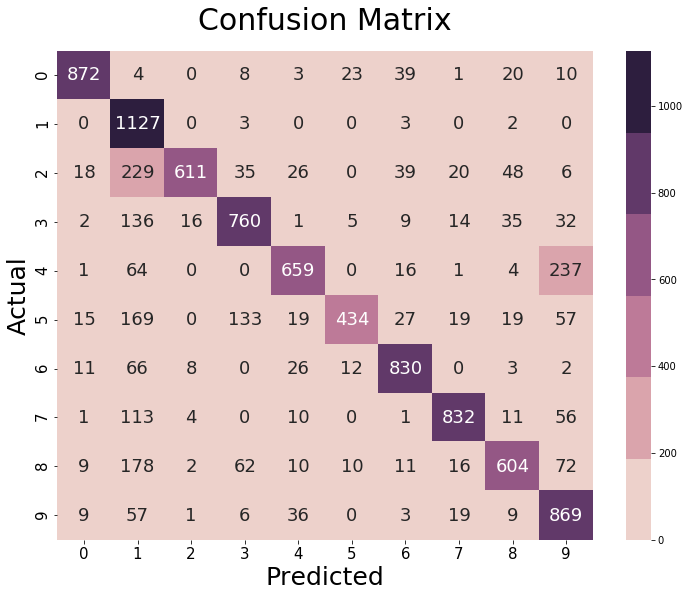

In [12]:
# Plotting the confusion Matrix
utills.confusion_matrix_plot(y_test, pred)

From the confusion matrix, we can infer that the model has the ability to identify digit "1" on a ease compared to other digit. However one thing to recall here is that even when we are using KNN on this clssification of the dataset, it was also able to identify "1" without much trouble. Moving on, this is having slight problems with identifying "2" and "4" where it identifies as "1" and "9" correspondingly. It is struggling in identifying 5 as it has the lower diagonal count. But we can be sure about it as it is not the accuracy. So lets try to answer this question by using identifying the testing errors on each digits seperately.

## Accuracy on each digit

It is quite obvious that confusion matrix cannot provide you with accurate information on each set accuracy although it provides some pattern. Let see what is accuracy and error on each digits below.

In [74]:
result_nb = utills.testing_error(y_test, pred)
result_nb

,Accuracy (%),Error (%),Label
0,88.9796,11.0204,0
1,99.2952,0.7048,1
2,59.2054,40.7946,2
3,75.2475,24.7525,3
4,67.1079,32.8921,4
5,48.6547,51.3453,5
6,86.6388,13.3612,6
7,80.9339,19.0661,7
8,62.0123,37.9877,8
9,86.1249,13.8751,9


In [97]:
utills.custom_analysis_line_plot(data = result_nb, x_col = 2, y_col = 0, title = "Accuracy For Each Digits", 
                     width = 800, height = 600, xlab = "Labels/Digits", ylab = "Testing Accuracy (%)", line_width = 4)

From the above table and the graph I have the below inferences

- Best prediction is for digit "1" with accuracy of 99.2952% which is almost 100% accurate and that is astonshing.
- Worst prediction is for digit "5" with accuracy of 48.6547% which is really bad
- Other than these two digits, such as "0", "6", "7" and "9" have testing accuracy greater than 80%

## Conditional Probability plot

The naive Bayes model provides the conditional probablity for each and every pixel of the images which on plotting over we get to know some interesting facts about the digits and why it has predcited an image to be that. Below we have 

- Correctly predcited image of a digit
- Wrongly predcited image of a digit with actual prior probablity
- Wrongly predicted same image of a digit with predicted prior probability

I have made this plot in such a way that the conditional probablities lies over true label gaussian distribution of the prediction. I have provided the table for each of my predcition that describes what is happening in the image.

# Digit "0" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |   0    |     0     |          0           |
|      Center    |   0    |     6     |          0           |
|      Right     |   0    |     6     |          6           |

The above table, the first column "Image Position" represents the digit position on the image, "Actual" represents the Actual label of the image, "Predcited" label of the image, "Gaussian Distribution" represents the gaussian distribution used to derive the conditional probability.

For example using test set, the left part of the below image shows a "0" which have been identified correctly as "0", the center part shows a "0" which is not identified correctly as "0" isntead identified as 6 and the right part shows the conditional probablity of the wrongly predicted (as 6) "0" with its conditional probability deriving from the wrongly predicted number's (6) gaussian distributions. Similarly you can infere the below images too. 

We can see that the second image "0" is predicted as 6 as it is has lots of overlay over the 6's Gaussian conditional probablity.

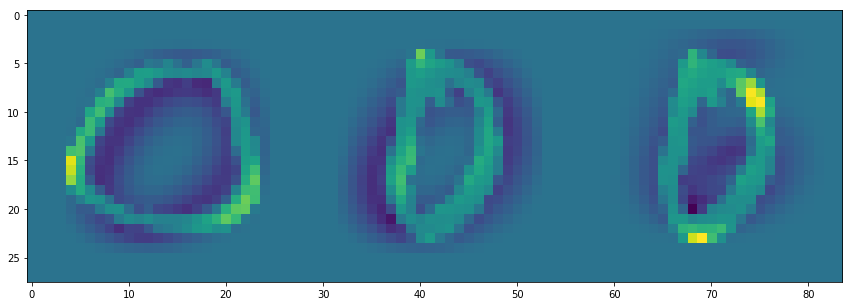

In [76]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 0)

# Digit "1" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |    1   |     1     |          1           |
|      Center    |    1   |     6     |          1           |
|      Right     |    1   |     6     |          6           |

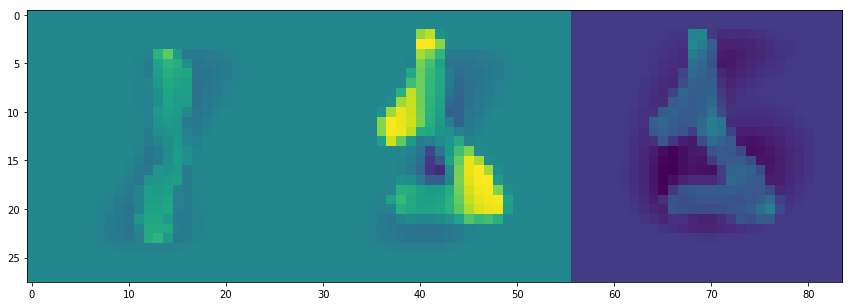

In [77]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 1)

# Digit "2" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |   2    |     2     |          2           |
|      Center    |   2    |     1     |          2           |
|      Right     |   2    |     1     |          1           |

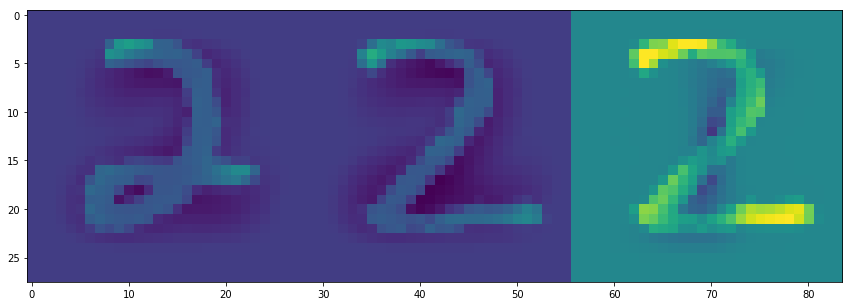

In [78]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 2)

# Digit "3" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |    3   |     3     |          3           |
|      Center    |    3   |     6     |          3           |
|      Right     |    3   |     6     |          6           |

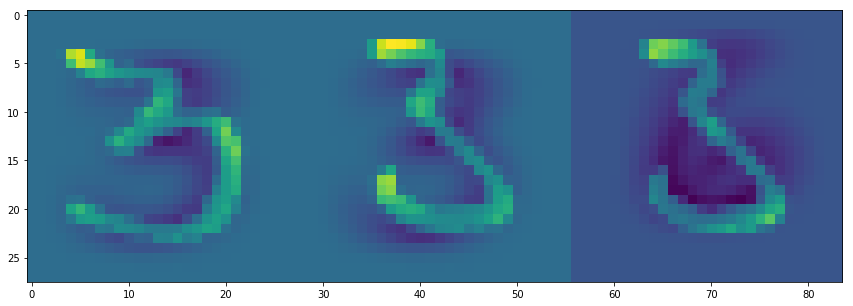

In [79]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 3)

# Digit "4" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |    4   |     4     |         4            |
|      Center    |    4   |     9     |         4            |
|      Right     |    4   |     9     |         9            |

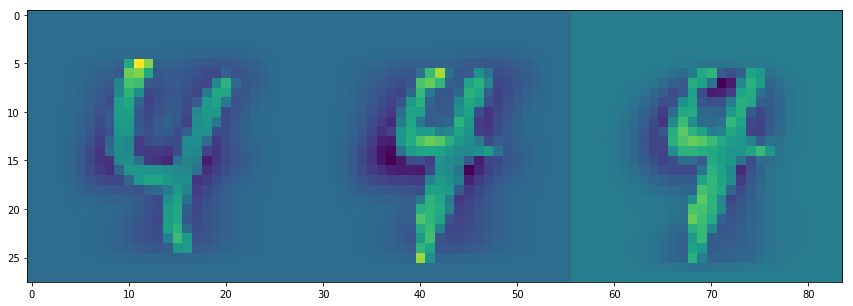

In [80]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 4)

# Digit "5" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |    5   |     5     |          5           |
|      Center    |    5   |     3     |          5           |
|      Right     |    5   |     3     |          3           |

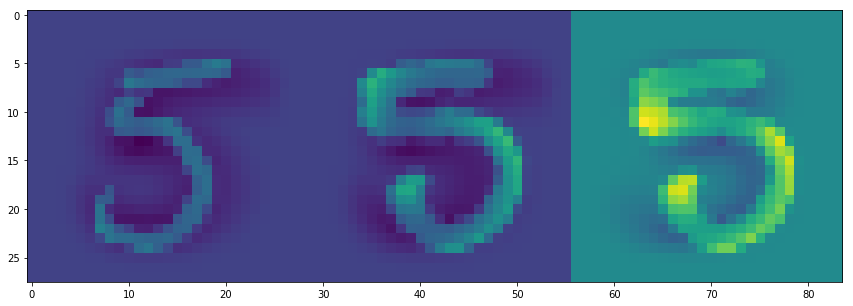

In [81]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 5)

# Digit "6" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |   6    |     6     |          6           |
|      Center    |   6    |     5     |          6           |
|      Right     |   6    |     5     |          5           |

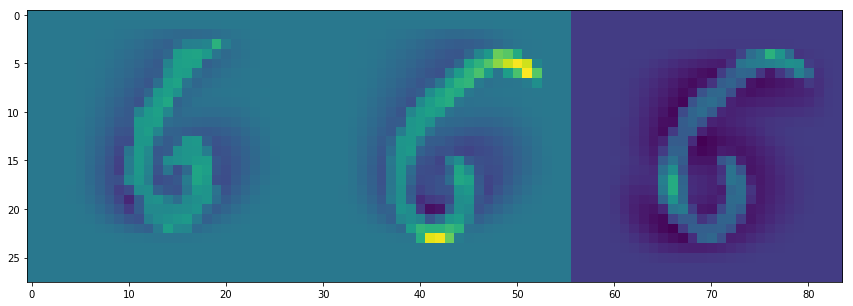

In [82]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 6)

# Digit "7" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |   7    |     7     |         7            |
|      Center    |   7    |     1     |         7            |
|      Right     |   7    |     1     |         1            |

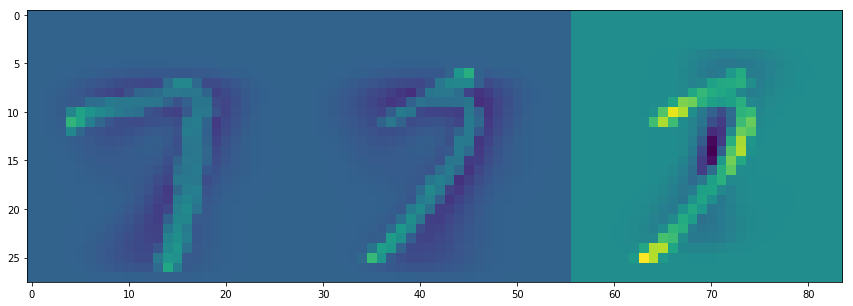

In [83]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 7)

# Digit "8" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |    8   |     8     |          8           |
|      Center    |    8   |     9     |          8           |
|      Right     |    8   |     9     |          9           |

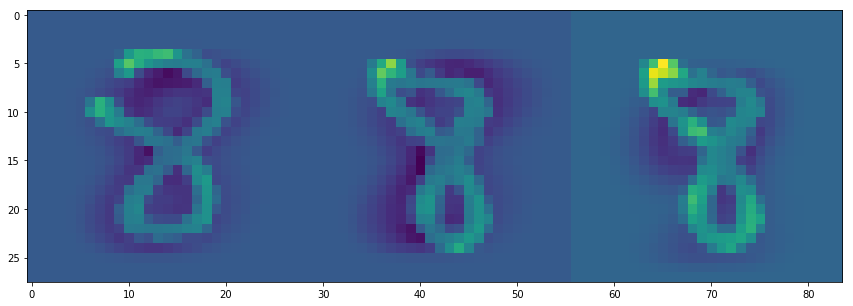

In [84]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 8)

# Digit "9" 

| Image Position | Actual | Predicted | Gassian Distribution |
|----------------|--------|-----------|----------------------|
|      Left      |   9    |     9     |          9           |
|      Center    |   9    |     1     |          9           |
|      Right     |   9    |     1     |          1           |

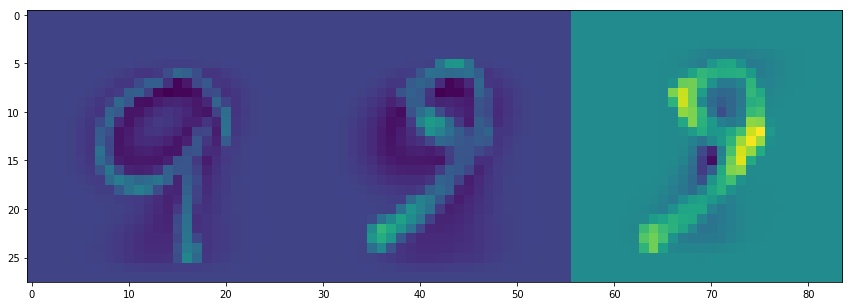

In [85]:
nb_model.conditional_prob_plot(X_test, y_test, pred, 9)

Thus above we have the images of the conditional probabilities. According to me with the above plots of the digits, I feel that naive bayes classifier works by the counting up the overlapping regions of the image over the conditional probability. That is if the there is maximum overlaps of the image pixels value with the gaussian of pixels for a particular class, than the image is going to be identified as that image.

## Part 2

(60 points) Build a regularized logistic regression classifier, where you use ridge (l2) regularization. Test this classifier on the MNIST data set by developing 10 classifiers: 0 versus all, 1 versus all, 2 versus all, ... , 9 versus all. Provide a confusion matrix, accuracy for each digit, and overall accuracy. Plot the overall test accuracy versus the regularization value where a log-scale is used for regularization value.

Essentially, the ‘1 versus all’ classifier is trained to give you a probability of the digit 1 versus all other digits. Hence, digit 1 is class +1 and all other digits are class -1. Hence, to classify a test image, you take the maximum probability from all 10 classifiers, giving the predicted class of the input image.

l2 regularized logistic regression uses the following log-likelihood,

<img src="https://raw.githubusercontent.com/nishanthgandhidoss/nishanthgandhidoss.github.io/master/image/Logistic%20Regression%201.png" alt="Logistic Regression Formula - 1" align="center" height="400" width="400"/>

Recall, that by taking the gradient of L(w), we obtained the following gradient descent update equation for (non-regularized) logistic regression,

<img src="https://raw.githubusercontent.com/nishanthgandhidoss/nishanthgandhidoss.github.io/master/image/Logistic%20Regression%202.png" alt="Logistic Regression Formula - 2" align="center" height="400" width="400"/>

Derive the update equation for the regularized logistic regression and present your derivation. Apply that classifier to the MNIST data set. Don’t forget to add a column of 1s to your 784-length feature vector (the image values) so that you get the bias term with your classifier. For each of your 10 trained classifiers, show an image of the 784 weights (don’t show the bias weight) as a 28  28 image. Do these images provide any insight to how this classifier works?

## Logistic Regression Class

In order to encapsulates everything under a hood, I have created the LogisticRegression class which will have functions that can be reused upon required.

In [13]:
class LogisticRegression(object):
    """ Performs LogisticRegression Classfication
    
    Trains a one versus all binary classifier model for categorical 
    prediction of a discrete target variable with the features 
    using gradient descent and rigde regulaizer. Best model is selected 
    by performing cross validation. Provides the error accuracy and 
    testing results for each class
    
    Arguments:
        n_epochs: Number of iteration to run for the gradient descent
            Default is 200 (Integer)
        learning_rate: Step size each update of the gradient descent.
            Default is 1.5e-5 (Float)
        lamda_values: Tune the importance of the ridge regulaizer
        best_acc: Accuracy of the best model from the model selection  = 0
        best_lamda: Best Lambda value for the dataset
        best_weights: Weights from the trained model
        accuracies: List of accuracies from the model training with cross 
            validation
        result_df: Accuracy and error of the data along with class labels
    
    Returns:
        LogisticRegression: Logistic Regression class instance
    """
    
    # Creating the instance of the utills class
    utills = Utills()
    
    def __init__(self, n_epochs = 200, learning_rate = 5e-5, lamda_values = [0.01, 0.1, 1, 10, 100]):
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.lamda_values = lamda_values
        self.best_acc = 0
        self.best_lamda = float("inf")
        self.best_weights = {}
        self.accuracies = []
        self.result_df = None
    
    def predict(self, X, y, weights = None, store_df = False):
        """ Predicts the labels for the features
        
        Takes the feature vectors and predcits the output label, stores
        error and accuracy on each label and also computes the overall 
        accuracy of the model on the test set
        
        Arguments:
            X: Data for which labels to be predicted
            y: Actual labels for the features
            labels: List of classes in the dataset
            weights: Pre trained weights if you have one other the 
                objects trained weights. Defaults to None
            store_df: Default is False. Boolean value indicating whether we 
                need to compute and store the testing error and accuracy on
                each labels in the data
        
        Returns:
            accuracy: Overall accuracy of the model on the given data
        """
        # Perform One hot encoding
        y_encoded = utills.onehot_encoder(y.reshape(len(y), 1))
        labels = np.unique(y)
        # Intialize the variables with empty arrays
        accuracy_list = np.array([])
        probs = []
        # Loop through each labels in the dataset
        for label in labels:
            # Check if weight is none, then get the object instance weight
            # compute the scores else use the weight passed as argument 
            if weights is None:
                scores = np.dot(X, self.best_weights[str(label)])
            else:
                scores = np.dot(X, weights[str(label)])
            # Compute the probabilites by passing the scores to the 
            # sigmoid function and make the rpediction with by setting
            # the thereshold of 0.5 
            pred_prob = self.sigmoid(scores)
            probs.append(pred_prob)
        probs = np.hstack(probs)
        pred = np.argmax(probs, axis = 1).reshape(probs.shape[0], 1)
        return pred
    
    def sigmoid(self, scores):
        """ Perform the sigmoid operation 
        
        Take the scores as inpout and performs the sigmoid operation on it 
        to the return the result. Sigmoid ranges from 0 to q. It is just the 
        probability score. Read more here:- 
        https://en.wikipedia.org/wiki/Sigmoid_function
        
        Arguments:
            scores: numoy array scores to be transformed to sigmoid 
        
        Returns:
            sigmoid: sigmoid transform of the scores
        """
        # Calculates the sigmoid
        sigmoid = 1 / (1 + np.exp(-scores))
        return sigmoid

    def gradient_descent(self, X, y, n_epochs, lamda = 0.1, verbose = False):
        """ Perform Gradient descent 
        
        Computes the gradient and update the weights for specified number of
        epochs using the errors and applying the ridge regrssion over the 
        errors computation
        
        Arguments:
            X: Feature data
            y: Labels for the features
            w: Inital weights
            n_epochs: No of epochs or iteration to be executed
            lamda: Regualrization parameter for the ridge regression. Default is 0.1
            
        Returns:
            w: Trained weights for the model
        """
        # Intialize the weights
        w = np.zeros((X.shape[1], 1))
        # Loops over the number of epochs for computating the gradients
        for epoch in range(n_epochs):
            N = X.shape[0]
            scores = X.dot(w)
            y_hat = self.sigmoid(scores)
            error = y_hat - y
            gradient = np.dot(X.T, error) + (lamda * w)
            if (epoch + 1) % (n_epochs // 5) == 0 and verbose:
                print("Epoch", epoch, np.sum(np.abs(gradient)) / len(gradient))
            w = w - (self.learning_rate) * gradient
        return w

    def fit(self, X, y):
        """ Fits the Logistic Regression 
        
        Train the model using the model selected using k fold cross 
        validation to get the optimal lambda values. the trained model
        is the list of weights for the features. Saves the weight to the
        class instance variable "best_weights"
        
        Arguments:
            X: Feature data vectors
            y: Labels for the feature
            
        Returns:
            None
        """
        # Get the object labels
        labels = np.unique(y)
        # Perform one hot encoding 
        y_encode = self.utills.onehot_encoder(y)
        # Add bias
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Get the 5 fold cross validation index
        cv = utills.k_fold(X, k = 5, seed = 1)
        # Perform K fold cv to select the best lambda values for the ridge
        # regression model
        for lamda in self.lamda_values:
            # Intailize the varibles 
            weights_temp = dict()
            acc_list = np.array([])
            # Loop over the K folds
            for train_cv, test_cv in cv:
                # Subsets the data according to the folds
                X_train_cv = X[train_cv]
                y_train_cv = y_encode[train_cv]
                X_test_cv = X[test_cv]
                y_test_cv = y[test_cv]
                # Compute the weights each labesl using gradient descent 
                # model with one versus all model
                for label in labels:
                    # Get the labels
                    y_label = y_train_cv[:, label].reshape(y_train_cv.shape[0], 1) 
                    # Compute the best weights and it to the weight dict
                    weight = self.gradient_descent(X_train_cv, y_label, n_epochs = self.n_epochs, lamda = lamda)
                    weights_temp[str(label)] = weight
                # Update the accuracy list for each labels
                acc_list = np.append(acc_list, self.testing_result(X_test_cv, y_test_cv, weights_temp))
            # Compute and update the overall accuracy for the fold to the list
            acc = np.mean(acc_list)
            self.accuracies.append(acc)
            # Keep updating the best lambda and weights
            if self.best_acc < acc:
                self.best_acc = acc
                self.best_lamda = lamda
        # Train the model again with the full training set with 
        # the best lambda values
        print("I am here")
        for label in labels:
            print(label)
            y_label = y_encode[:, label]
            weight = self.gradient_descent(X, y_label.reshape(len(y_label), 1), n_epochs = self.n_epochs, 
                                           lamda = 1, verbose = True)
            self.best_weights[str(label)] = weight
            
    def weights_plot(self, labels):
        """ Create plots using Model weights

        Take the trained weights leaving bechind the bias for all the 
        labels in the dataset and creates a plot of the weights that
        helping to understand what has made the model to predict the new
        images to a certain label

        Arguments:
            labels: Labels of the data

        Returns:
            None (plots the images)
        """
        plt.figure(figsize = (19, 9))
        # Loop through the labels 
        for label in labels:
            # Subset the weight
            w = self.best_weights[str(label)][1:].reshape(28, 28)
            # Show the image of the weights
            ax = plt.subplot(2, 5, label + 1)
            ax.set_title(str(label), fontsize = 30)
            plt.imshow(w)
        plt.suptitle("Weights for each Labels", fontsize = 30)
        plt.show()

As we have the class lets use them to compute the overall acuracy by fitting and predicting with the model.

In [ ]:
# Store the starting time for query time computation
start_time = timeit.default_timer()

# Create the class instances
utills = Utills()
clf = LogisticRegression(n_epochs = 2000)

# Transform the features using z score normalization
X_train_norm = utills.z_score_norm(X_train)

# Create the path model object
my_file = Path("model100.hdf5")
# Check if the trained model file is already exists if then
# load the model else fit the model 
if my_file.is_file():
    # Open the file
    with open('model.hdf5', 'rb') as fp:
        # load the pickle file and intialize the object instance
        clf = pickle.load(fp)
else:
    # Fit the Logistic regression model over the training data
    clf.fit(X_train_norm, y_train)
    # Store the model
    with open("model.hdf5", "wb") as fp:
        pickle.dump(clf, fp)

# Print the Query time
print("Run time:", round((timeit.default_timer() - start_time) / 60, 2), "minutes")

The model took almost 2 and half hours to completely train by doing model seletion with 5 fold cross validation. I stored the model with all its attributes such as weights, best lamda values, training accuracies etc. to reuse it and reduce the computation time whenever you need to access the model somewhere quickly. 

## Training accuracies vs Lambda values

Lets just see how the model has selected the best lambda values using 5 fold cross validation by visualizing each lambda values and its accuracies while on training the model.

In [88]:
# Create a dataframe of lamba and accuracies
train_results = pd.DataFrame({'lambda': np.log(clf.lamda_values), 'accuracy': clf.accuracies})
# Make the plot
utills.custom_analysis_line_plot(train_results, 1, 0, "Training Accuracies vs Lambda", xlab = "Lambda", 
                                 ylab = "Accuracy")

We can see that the model has best performance at lambda value of 1 (which log value is 0) with the accuracy of 91.05%. Thus we used this lambda value to predict the best accuracy on the test set.

## Overall accuracy

I am using the best model which I have selected using 5 fold cross validation on the train set that has lambda value of 1 and runs for 3000 iteration of gradient descent. I am applying this model on my test set to come up with the testing accuracy.

In [89]:
# Transform the features using z score normalization
X_test_norm = utills.z_score_norm(np.hstack((np.ones((X_test.shape[0], 1)), X_test)))

# Encode the labels
y_test_encoded = utills.onehot_encoder(y_test)

# Make the prediction on test set
pred = clf.predict(X_test_norm, y_test, store_df = False)

# Calculate the accuracy
accuracy = utills.accuracy(y_test, pred)

# Print the lambda value used and the accuracy
print("The accuracy of the model with", clf.best_lamda, "as lambda is", accuracy)

The accuracy of the model with 1 as lambda is 90.87


Thus the logistic regression model has an accuracy of 90.87% on the testing dataset which has better accuracy than the  naive bayes model that I did in the first question. Let just do some analysis over the trained model and test run results.

## Testing accuracies vs Lambda values

Lets just see how the best selected model (ie. the one with 3000 epochs) is performing over the test set with different lambda values that where used while on training.

In [98]:
# Create a dataframe of lamba and accuracies
test_results = pd.DataFrame({'lambda': np.log(clf.lamda_values), 'accuracy': clf.testing_accuracies})
# Make the plot
utills.custom_analysis_line_plot(test_results, 1, 0, "Testing Accuracies vs Lambda", xlab = "Lambda", 
                                 ylab = "Accuracy")

Thus the abpve plot shows that with different lambda values (0.01, 0.1, 1, 10, 100) on the test set, we get the maximum performance of 90.87 when we set the lambda equal to 1.

## Confusion Matrix

Lets view little deep inside the test set accuracy using the confusion matrix.

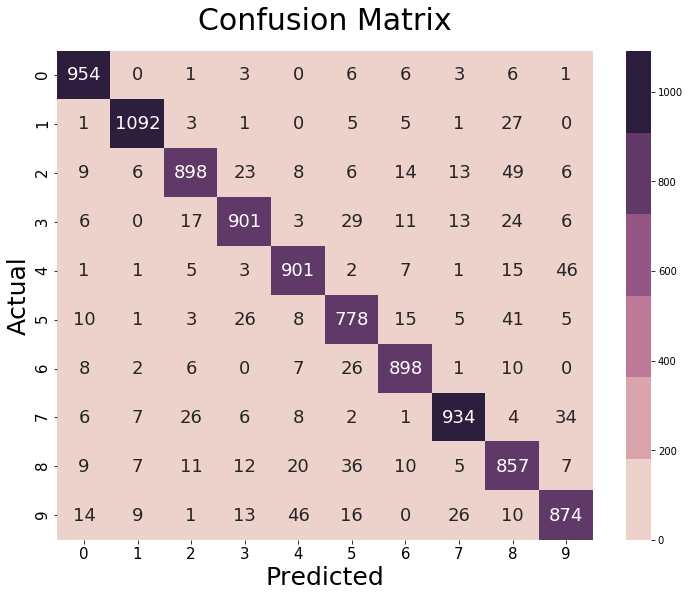

In [91]:
utills.confusion_matrix_plot(y_test, pred)

From the above confusion matrix, we can infer the following

- Most of the 2s are getting predicted to be 8 by this model
- Similarly, next to that most of the 9s are predcited to 4 by the model
- Right after both of the above misclassification, we have our 5s most likely to be predcited as 8

## Testing Accuracy on each digit

It is quite obvious that confusion matrix cannot provide you with accurate information on each set accuracy although it provides some pattern. Let see what is accuracy and error on each digits below.

In [92]:
result_lr = utills.testing_error(y_test, pred)
result_lr

,Accuracy (%),Error (%),Label
0,97.3469,2.6531,0
1,96.2115,3.7885,1
2,87.0155,12.9845,2
3,89.2079,10.7921,3
4,91.7515,8.2485,4
5,87.2197,12.7803,5
6,93.7370,6.2630,6
7,90.8560,9.1440,7
8,87.9877,12.0123,8
9,86.6204,13.3796,9


In [96]:
utills.custom_analysis_line_plot(data = result_lr, x_col = 2, y_col = 0, title = "Accuracy For Each Digits", 
                     width = 800, height = 600, xlab = "Labels/Digits", ylab = "Testing Accuracy (%)", line_width = 4)

From the above table and the graph I have the below inferences

- Best prediction is for digit "0" with accuracy of 97.3469% which is quite good
- Worst prediction is for digit "9" with accuracy of 86.6204% but we can say that it is not that bad
- Digits such as "0", "1", "4", "6", "7" have accuracy rates greater than 90%

## Weights plot

Here I have plotted the weights coverted into 28 * 28 image for each classes to see whether there is any hidden patterns in the trained weights from the logistic model.

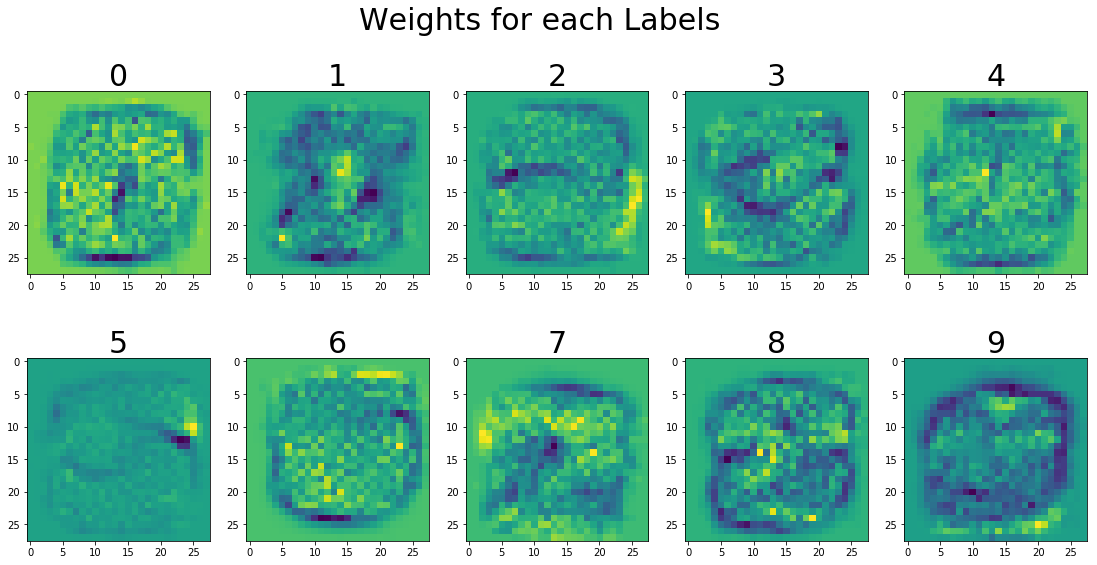

In [94]:
clf.weights_plot(np.unique(y_test))

And as I expected, the plotted weights of the classes shows the pattern for each of the digit although it is not pretty clear due the noises. If we look close on the weights plot, we can see the corressponding digit visible on the plot. This is awesome and clears the fact that how logistic regression uses the weights that are patterns for each digits and predicts the label for new images.

Further in the confusion matrix plot we say that 2s are predcited to be 8s. Now if you see the weight plots are 2 and 8, you can see that there is lot of similarity between the those. And that is the reason for the misclassification and thats how logistic regression works.